In [46]:
using DifferentialEquations, JLD2, Plots, SparseArrays

In [85]:
QhetConj = 1
IfiltMem = 2

Tfilt1=0.1

u0 = ComplexF32[0., 0.]

Iraw(t) = 10*t

function filt!(du, u, p, t)
    du[QhetConj] = Iraw(t)
    du[IfiltMem] = -u[IfiltMem]/Tfilt1 -u[QhetConj]/(Tfilt1^2)
end

function σ_filt!(du, u, p, t)
    @inbounds du[QhetConj] = 0.0
    @inbounds du[IfiltMem] = 0.0
end

prob_dicke = SDEProblem{true}(filt!, σ_filt!, u0, (0.0, tmax), pinit)
sol = solve(prob_dicke, SRA2(), save_noise=true)

retcode: Success
Interpolation: 1st order linear
t: 2556-element Vector{Float64}:
 0.0
 1.0e-6
 2.125e-6
 3.3906250000000003e-6
 4.814453125e-6
 6.4162597656250006e-6
 8.218292236328125e-6
 1.0245578765869141e-5
 1.2526276111602784e-5
 1.5092060625553133e-5
 1.7978568203747277e-5
 2.1225889229215687e-5
 2.487912538286765e-5
 ⋮
 4.933954196198539
 4.939992790522751
 4.9460387861782475
 4.952092192746094
 4.958153018893837
 4.964221274179381
 4.970296967291648
 4.976380105952257
 4.982470699656867
 4.988568756609623
 4.994674285861425
 5.0
u: 2556-element Vector{Vector{ComplexF32}}:
 [0.0f0 + 0.0f0im, 0.0f0 + 0.0f0im]
 [5.0f-12 + 0.0f0im, -0.0f0 + 0.0f0im]
 [2.2578125f-11 + 0.0f0im, -1.1953092f-15 + 0.0f0im]
 [5.748169f-11 + 0.0f0im, -5.7547397f-15 + 0.0f0im]
 [1.15894794f-10 + 0.0f0im, -1.737589f-14 + 0.0f0im]
 [2.0584194f-10 + 0.0f0im, -4.2115996f-14 + 0.0f0im]
 [3.3770164f-10 + 0.0f0im, -8.962612f-14 + 0.0f0im]
 [5.2485943f-10 + 0.0f0im, -1.7497355f-13 + 0.0f0im]
 [7.84538f-10 + 0.0f0

In [86]:
Ifilt = map(x->x[QhetConj]/Tfilt1+x[IfiltMem],sol.u)
Qhet = map(x->x[QhetConj],sol.u)
Imem = map(x->x[IfiltMem],sol.u)

2556-element Vector{ComplexF32}:
          0.0f0 + 0.0f0im
         -0.0f0 + 0.0f0im
 -1.1953092f-15 + 0.0f0im
 -5.7547397f-15 + 0.0f0im
  -1.737589f-14 + 0.0f0im
 -4.2115996f-14 + 0.0f0im
  -8.962612f-14 + 0.0f0im
 -1.7497355f-13 + 0.0f0im
 -3.2131936f-13 + 0.0f0im
 -5.6383587f-13 + 0.0f0im
  -9.554181f-13 + 0.0f0im
 -1.5749855f-12 + 0.0f0im
 -2.5395161f-12 + 0.0f0im
                ⋮
   -1168.8558f0 + 0.0f0im
   -1171.7767f0 + 0.0f0im
   -1174.7048f0 + 0.0f0im
   -1177.6401f0 + 0.0f0im
   -1180.5828f0 + 0.0f0im
   -1183.5326f0 + 0.0f0im
   -1186.4897f0 + 0.0f0im
   -1189.4542f0 + 0.0f0im
    -1192.426f0 + 0.0f0im
   -1195.4053f0 + 0.0f0im
   -1198.3918f0 + 0.0f0im
      -1201.0f0 + 0.0f0im

In [97]:
p = plot(sol.t, [real.(Ifilt), Iraw.(sol.t)], title="Input vs Filtered Current", label=["Filtered" "Raw"])
savefig(p, "InputVSFilt.png")

"/Users/henryhunt/Desktop/LabNotebooks/DickeModel/InputVSFilt.png"

In [98]:
p = plot(sol.t, [real.(Qhet)/Tfilt1 real.(Imem)], title="Charge and Memory Terms", label=["Charge over \$T_{filt.}\$(Q/\$T_{filt.}\$)" "Memory Term (\$I_{mem.}\$)"])
savefig(p, "ChargeAndMem.png")

"/Users/henryhunt/Desktop/LabNotebooks/DickeModel/ChargeAndMem.png"

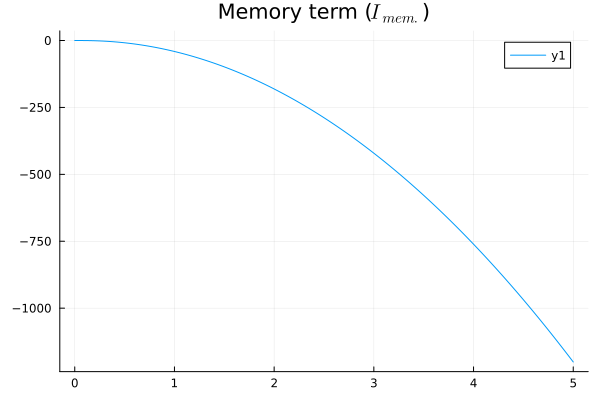

In [91]:
plot(sol.t, real.(Imem), title="Memory term (\$I_{mem.}\$)")

In [18]:
t_arr = LinRange(0.0, 5.0, 1000)

1000-element LinRange{Float64, Int64}:
 0.0, 0.00500501, 0.01001, 0.015015, …, 4.98498, 4.98999, 4.99499, 5.0

In [39]:
size(sol.W.u)

(1852,)

In [35]:
sol.W(0.1)

(ComplexF64[-0.09309191359743545 + 0.6525831714903296im, -0.2165498436220151 - 0.08137511734923439im], ComplexF64[0.016090820496636047 + 0.07416209866059013im, -0.0902983478003094 + 0.07694672889386711im])

In [37]:
white_noise = zeros(eltype(sol.W.u), length(t_arr))
dt = t_arr[2] - t_arr[1]
for i in 1:(length(t_arr))
    white_noise[i] = (sol.W.u[i+1] - sol.W.u[i]) / dt
end
white_noise

LoadError: MethodError: no method matching zero(::Type{Vector{ComplexF64}})

[0mClosest candidates are:
[0m  zero([91m::Type{Union{}}[39m, Any...)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:310[24m[39m
[0m  zero([91m::Type{Random123.uint32x4}[39m)
[0m[90m   @[39m [35mRandom123[39m [90m~/.julia/packages/Random123/d3ctu/src/aarch64/[39m[90m[4maesni_common.jl:102[24m[39m
[0m  zero([91m::Type{Pkg.Resolve.VersionWeight}[39m)
[0m[90m   @[39m [36mPkg[39m [90m~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Resolve/[39m[90m[4mversionweights.jl:15[24m[39m
[0m  ...
